In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy.io import arff
import data_processing as dp
import warnings
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    confusion_matrix,
    classification_report,
    precision_score,
)

warnings.filterwarnings("ignore")

data = arff.loadarff("../../data/3year.arff")
df = pd.DataFrame(data[0])
df_origin = df.copy()

In [31]:
def SVM_model(*args):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    # Training the SVM model
    svm_model = SVC(
        kernel="linear"
    )  # You can choose different kernels based on your data
    svm_model.fit(X_train, y_train)

    # Predictions on the testing set
    y_pred_train = svm_model.predict(X_train)
    y_pred_test = svm_model.predict(X_test)

    # Evaluating the model
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision_score_ = precision_score(y_test, y_pred_test)
    recall_score_ = recall_score(y_test, y_pred_test)
    f1_score_ = f1_score(y_test, y_pred_test)

    print(classification_report(y_test, y_pred_test))
    print(f"precision_score: {precision_score_}")
    print(f"recall_score: {recall_score_}")
    print(f"train_accuracy: {train_accuracy}")
    print(f"test_accuracy: {test_accuracy}")
    print(f"f1score: {f1_score_}")

    return train_accuracy, test_accuracy, y_pred_test

In [41]:
def SVM_return_model(*args):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    # Training the SVM model
    svm_model = SVC(
        kernel="linear"
    )  # You can choose different kernels based on your data
    svm_model.fit(X_train, y_train)

    # Predictions on the testing set
    y_pred_train = svm_model.predict(X_train)
    y_pred_test = svm_model.predict(X_test)

    # Evaluating the model
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision_score_ = precision_score(y_test, y_pred_test)
    recall_score_ = recall_score(y_test, y_pred_test)
    f1_score_ = f1_score(y_test, y_pred_test)

    print(classification_report(y_test, y_pred_test))
    print(f"precision_score: {precision_score_}")
    print(f"recall_score: {recall_score_}")
    print(f"train_accuracy: {train_accuracy}")
    print(f"test_accuracy: {test_accuracy}")
    print(f"f1score: {f1_score_}")

    return svm_model

In [28]:
train_test_dataset = dp.pre_process(df)  # with SMOTE
print(f"X_train.shape: {train_test_dataset[0].shape}")

X_train.shape: (13978, 30)


To Do:
- check linear separability

In [32]:
train_accuracy, test_accuracy, y_pred_test = SVM_model(*train_test_dataset)
print(train_accuracy)
print(test_accuracy)

# kernel = rbf , [train, test] = [0.5304764630133066, 0.5147572199301809]
# kernel = linear, [train, test] = [0.537201316354271, 0.5728340209457315]

              precision    recall  f1-score   support

           0       0.96      0.58      0.72      3017
           1       0.05      0.47      0.09       134

    accuracy                           0.57      3151
   macro avg       0.50      0.52      0.40      3151
weighted avg       0.92      0.57      0.69      3151

precision_score: 0.04708520179372197
recall_score: 0.4701492537313433
train_accuracy: 0.537201316354271
test_accuracy: 0.5728340209457315
f1score: 0.08559782608695651
0.537201316354271
0.5728340209457315


precision_score: 0.04259927797833935
recall_score: 0.44029850746268656
precision_score: 0.04404332129963899
recall_score: 0.4552238805970149
precision_score: 0.044543429844097995
recall_score: 0.44776119402985076
precision_score: 0.04491017964071856
recall_score: 0.44776119402985076
precision_score: 0.04432757325319309
recall_score: 0.44029850746268656
precision_score: 0.045722713864306784
recall_score: 0.4626865671641791
precision_score: 0.045925925925925926
recall_score: 0.4626865671641791
precision_score: 0.04595997034840623
recall_score: 0.4626865671641791
precision_score: 0.04758364312267658
recall_score: 0.47761194029850745
precision_score: 0.0475482912332838
recall_score: 0.47761194029850745
precision_score: 0.047725577926920205
recall_score: 0.47761194029850745
precision_score: 0.04776119402985075
recall_score: 0.47761194029850745
precision_score: 0.04776119402985075
recall_score: 0.47761194029850745
precision_score: 0.04776119402985075
recall_score: 0.47761194029850745
precisi

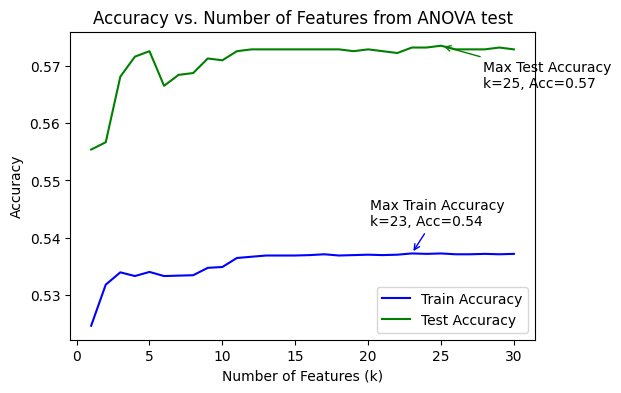

25


In [12]:
best_train_test_dataset = dp.find_best_k_features_from_ANOVA(
    SVM_model, *train_test_dataset[:2]  # bc i added y_pred_test
)
print(len(best_train_test_dataset[0].columns))
# Best k for train_accuracy: 23
# Best k for test_accuracy: 25

In [ ]:
SVM_model(*best_train_test_dataset)

UnboundLocalError: cannot access local variable 'f1_score' where it is not associated with a value

In [16]:
X_train, X_test, y_train, y_test = best_train_test_dataset
conf_matrix = confusion_matrix(y_test, y_test)

GridSearchCV
https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

In [21]:
# defining parameter range
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"],
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)


# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=  11.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=  10.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=  11.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=  11.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.517 total time=  11.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=  11.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.523 total time=  11.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=  11.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=  11.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=  11.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.525 total time=  12.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [33]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred_test))

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72      3017
           1       0.05      0.47      0.09       134

    accuracy                           0.57      3151
   macro avg       0.50      0.52      0.40      3151
weighted avg       0.92      0.57      0.69      3151

              precision    recall  f1-score   support

           0       0.98      0.53      0.69      3017
           1       0.07      0.77      0.13       134

    accuracy                           0.54      3151
   macro avg       0.52      0.65      0.41      3151
weighted avg       0.94      0.54      0.67      3151



In [48]:
clf = SVM_return_model(*best_train_test_dataset)

              precision    recall  f1-score   support

           0       0.96      0.58      0.72      3017
           1       0.05      0.47      0.09       134

    accuracy                           0.57      3151
   macro avg       0.50      0.52      0.40      3151
weighted avg       0.92      0.57      0.69      3151

precision_score: 0.04715568862275449
recall_score: 0.4701492537313433
train_accuracy: 0.5372728573472599
test_accuracy: 0.5734687400825135
f1score: 0.0857142857142857


SVM visualisation

In [50]:
"""from sklearn.svm import SVC

X = X_train
y = y_train

# Get support vectors and coefficients
support_vectors = clf.support_vectors_
coef = clf.coef_[0]
intercept = clf.intercept_

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker="o")

# Plot support vectors
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(
    xx, yy, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# Plot hyperplane
plt.plot(xx, (-coef[0] * xx - intercept) / coef[1], "k--")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.show()
"""

InvalidIndexError: (slice(None, None, None), 0)